# Reproduction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
jar = pd.read_csv('bei.tsv', sep='\t')
jar

,Fd,fgs,grain_size
0,0.051353,0.0197,1.34
1,0.102705,0.1670,1.34
2,0.154058,0.4410,1.34
3,0.205410,0.7730,1.34
4,0.256763,1.1600,1.34
...,...,...,...
543,6.829889,29.9000,17.00
544,6.881242,30.0000,17.00
545,6.932594,30.0000,17.00
546,6.983947,30.0000,17.00


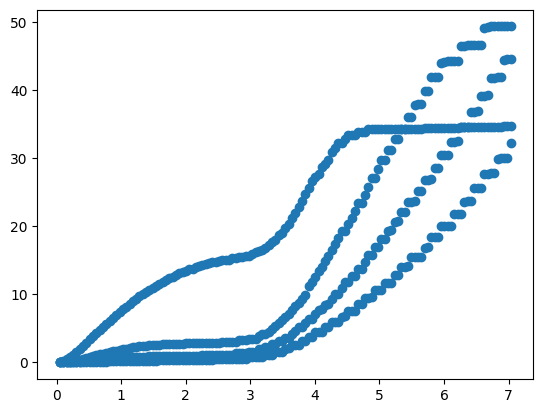

In [3]:
plt.scatter(jar['Fd'], jar['fgs'])

In [4]:
def ben(fd, D):
    a=14.55352
    b=-0.13102
    c=3.18009
    d=-0.45099
    e=3.51274
    f=0.23686
    g=16.1437
    h=15.87839
    j=3.18205
    k=-0.92817
    l=0.69424
    m=1.17983
    def f1(fd, D):
        return a * D**b / (1+np.exp(-c * D**d * (fd - e * D**f))) / (1+np.exp(-50 * (fd-0.2)))
    def f2(fd, D):
        return (g * np.log(D) + h) / (1+np.exp(-j * D**k * (fd - l * D**m)))
    def fc(fd):
        return 1 / (1+np.exp(-2 * (fd - 1)))
    
    return (f1(fd, D) + f2(fd, D)) * fc(fd)

In [5]:
ben(5, 1.34)

34.162253948045944

In [6]:
jar['grain_size'].unique()

array([ 1.34,  4.4 ,  8.5 , 17.  ])

In [7]:
def grain_plot(gr):
    sp_grain = jar.loc[jar['grain_size'] == gr]
    fn_fgs = []
    for ind, row in sp_grain.iterrows():
        fn_fgs.append(ben(row['Fd'], row['grain_size']))
    plt.plot(sp_grain['Fd'], sp_grain['fgs'])
    plt.plot(sp_grain['Fd'], fn_fgs)

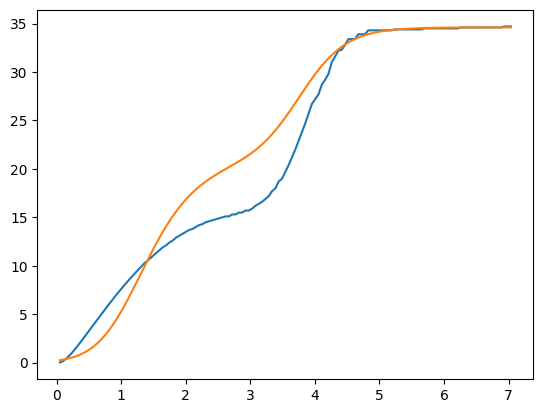

In [8]:
grain_plot(1.34)

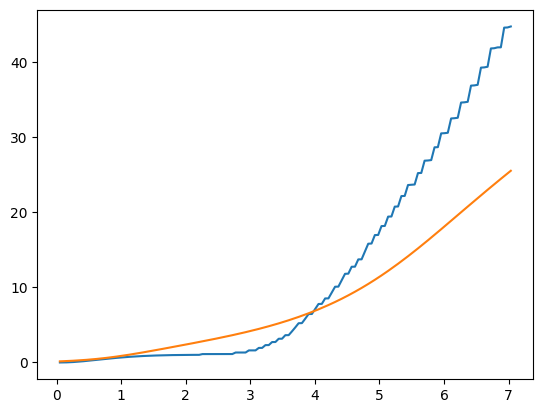

In [9]:
grain_plot(8.5)

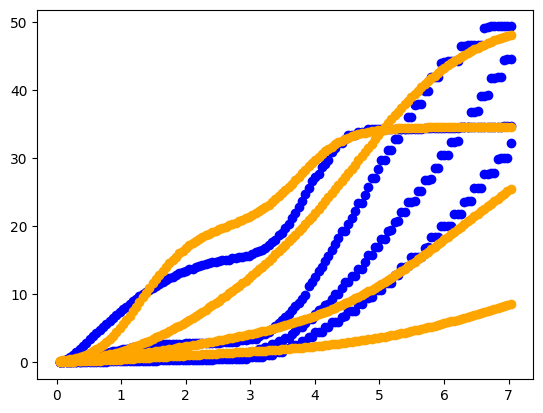

In [10]:
fn_fgs = []
for ind, row in jar.iterrows():
    fn_fgs.append(ben(row['Fd'], row['grain_size']))
plt.scatter(jar['Fd'], jar['fgs'], c='blue')
plt.scatter(jar['Fd'], fn_fgs, c='orange')

# FY21 functions on new data

In [11]:
foo = pd.read_csv('nominal_set.csv')

In [12]:
foo

,Unnamed: 0,Grain-size-ratio index,Grain Size (um),Operation Days,Heat Flux (W/cm2),Fission Rate (10^14 f/cm3/s),Coolant init Temp (C),Fuel Temp (C),Fission Density (10^21 f/cm3),Fuel Swelling (%),Fuel Gas Swelling (%)
0,9639,1,1.34,3,240.0,6,88,144.190800,0.15552,1.076110,0.454030
1,9640,1,1.34,4,240.0,6,88,144.234126,0.20736,1.624573,0.795133
2,9641,1,1.34,5,240.0,6,88,144.343498,0.25920,2.229238,1.192438
3,9642,1,1.34,6,240.0,6,88,144.398119,0.31104,2.864830,1.620669
4,9643,1,1.34,7,240.0,6,88,144.455641,0.36288,3.519626,2.068106
...,...,...,...,...,...,...,...,...,...,...,...
660,13423,5,34.00,131,240.0,6,88,147.617697,6.79104,44.498610,17.334450
661,13424,5,34.00,132,240.0,6,88,147.697803,6.84288,44.961899,17.590379
662,13425,5,34.00,133,240.0,6,88,147.739712,6.89472,45.660155,18.081275
663,13426,5,34.00,134,240.0,6,88,147.821740,6.94656,46.365356,18.579116


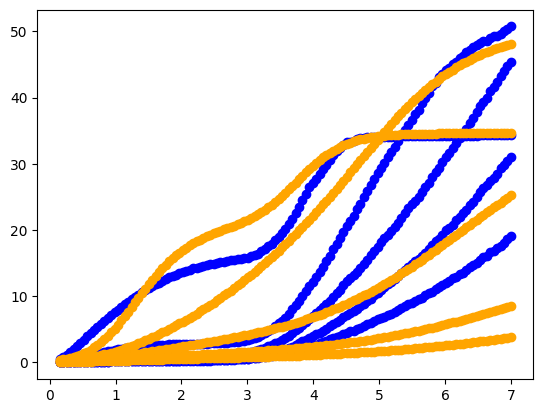

In [13]:
fn_fgs = []
for ind, row in foo.iterrows():
    fn_fgs.append(ben(row['Fission Density (10^21 f/cm3)'], row['Grain Size (um)']))
plt.scatter(foo['Fission Density (10^21 f/cm3)'], foo['Fuel Gas Swelling (%)'], c='blue')
plt.scatter(foo['Fission Density (10^21 f/cm3)'], fn_fgs, c='orange')

## Fission rate and temperature

The dependence on these two are decoupled. The fitted parameters don't take into account both at once.

- Where's the fission rate and temperature in Bei's data though?

Dr. Beeler's nominal set:
- 8.5 um
- 5.9 x 10^14 f/cm^3-s
- 150 C

My nominal set:
- 6 x 10^14 f/cm^3-s
- 88 C
- 240 W/cm^2

Since the nominal fission rates are close enough, I am implementing the temperature dependence here.

In [14]:
def temp(orig, T):
    return orig * (0.0088 * T - 0.3235)

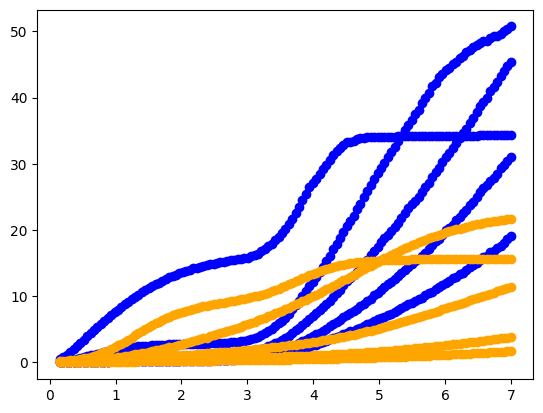

In [15]:
fn_fgs = []
for ind, row in foo.iterrows():
    orig = ben(row['Fission Density (10^21 f/cm3)'], row['Grain Size (um)'])
    fn_fgs.append(temp(orig, 88))
    #fn_fgs.append(temp(orig, row['Coolant init Temp (C)']))
plt.scatter(foo['Fission Density (10^21 f/cm3)'], foo['Fuel Gas Swelling (%)'], c='blue')
plt.scatter(foo['Fission Density (10^21 f/cm3)'], fn_fgs, c='orange')

# Jahid's model on Bei's data

In [16]:
def pared(fd, D):
    a1 = 2.53
    b1 = 0.606
    c1 = 4.27
    d1 = 0.45
    def A(D):
        return a1 * np.exp(-b1*(D-c1)) + d1
    
    def B(D):
        return 3.08
    
    def C(D):
        return 0.932
    
    a4 = 38.431
    b4 = 0.09157
    c4 = 0.75734
    h4 = 17.9118
    def L(D):
        return a4 * np.exp(-b4*D) * np.log(c4*D) + h4
    
    a5 = 1.78
    b5 = 0.59
    c5 = 2.14
    d5 = 1.15
    def M(D):
        return a5 * np.exp(-b5*(D-c5)) + d5
    
    b6 = 2.04
    c6 = 2.95
    k6 = 0.24
    def N(D):
        return c6 * (b6 - np.exp(-k6*D))
    
    return A(D) / (1 + np.exp(-B(D) * (fd - C(D)))) \
        + L(D) / (1 + np.exp(-M(D) * (fd - N(D))))

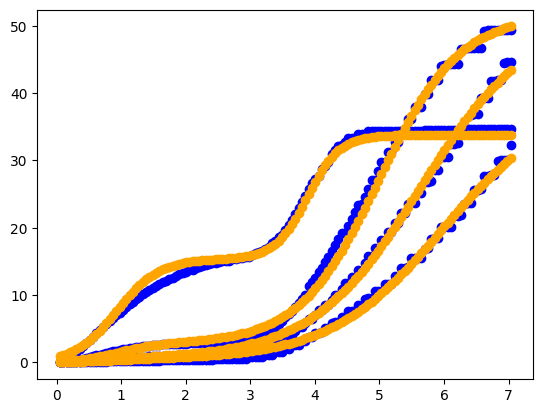

In [17]:
fn_fgs = []
for ind, row in jar.iterrows():
    fn_fgs.append(pared(row['Fd'], row['grain_size']))
plt.scatter(jar['Fd'], jar['fgs'], c='blue')
plt.scatter(jar['Fd'], fn_fgs, c='orange')